In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate data
np.random.seed(0)
centers = [[-5,0],[0,1.5]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=42)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

X = np.c_[np.ones((X.shape[0],1)), X]

W = np.zeros(X.shape[1])

def sigmoid(z):
    return 1/(1+np.exp(-z))
def log_loss(y_true,y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred,epsilon,1-epsilon)
    return - (y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))






[693.1471805599454, 632.3044539991922, 581.6082708050916, 539.1470160298675, 503.3208964220936, 472.8370069948698, 446.669813241493, 424.0123303595646, 404.2302658972168, 386.82350740159194]


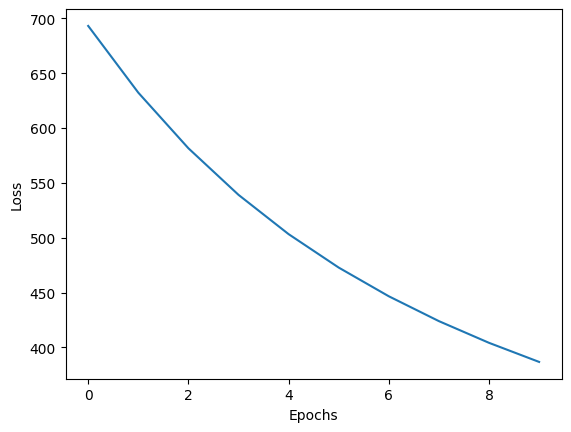

In [218]:
one_T_N = np.ones((1, len(y)))
learning_rate = 0.1
epochs = 10
loss_history = []
for i in range(epochs):
    y_pred = sigmoid(np.dot(X,W))
    y_pred = y_pred.reshape(len(y))
    loss = log_loss(y,y_pred)
    loss_history.append(np.sum(loss))
    error=np.diag(y_pred-y)
    #print(one_T_N.shape,error.shape,X.shape)
    gradient = np.dot(one_T_N,error)
    gradient = np.dot(gradient,X)
    W=W.reshape(3,1)
    W -= learning_rate*gradient.T/len(y)
print(loss_history)
#plot loss history
plt.plot(range(epochs),loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


[[0.25 0.   0.   ... 0.   0.   0.  ]
 [0.   0.25 0.   ... 0.   0.   0.  ]
 [0.   0.   0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.25 0.   0.  ]
 [0.   0.   0.   ... 0.   0.25 0.  ]
 [0.   0.   0.   ... 0.   0.   0.25]]


[693.1471805599454, 184.7000278155797, 133.144417425776, 107.9263207982294, 92.43679403326102, 81.77821119723123, 73.91566323111948, 67.83459128812123, 62.96666529844286, 58.96638397994397]


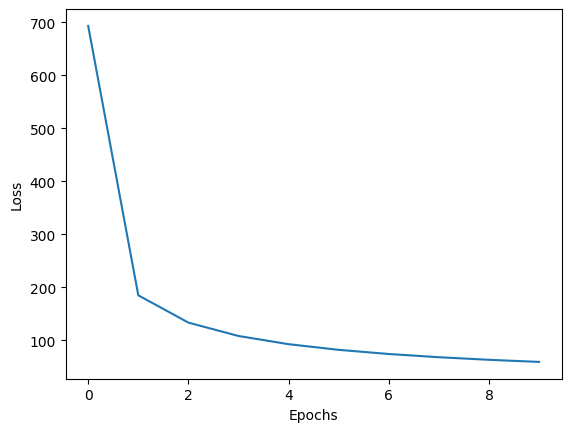

In [219]:
one_T_N = np.ones((1, len(y)))
learning_rate = 0.1
epochs = 10
loss_history2 = []

#X = np.dot(X, transformation)
W = np.zeros(X.shape[1])

y_pred = sigmoid(np.dot(X,W))
y=y.flatten()
y_pred = y_pred.flatten()

s=(y_pred-y)*(1-y_pred-y)
S=np.diag(s)
print(S)
for i in range(epochs):
    y_pred = sigmoid(np.dot(X,W))
    y_pred = y_pred.flatten()
    y=y.flatten()
    loss = log_loss(y,y_pred)
    loss_history2.append(np.sum(loss))
    error=np.diag(y_pred-y)
    gradient = np.dot(one_T_N,error)
    gradient = np.dot(gradient,X)
    W=W.reshape(3,1)
    co=np.dot(np.dot(X.T,S),X)/len(y)
    #take the inverse of co
    co=np.linalg.inv(co)
    
    W -= np.dot(co,gradient.T/len(y))
print(loss_history2)


#plot loss history
plt.plot(range(epochs),loss_history2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


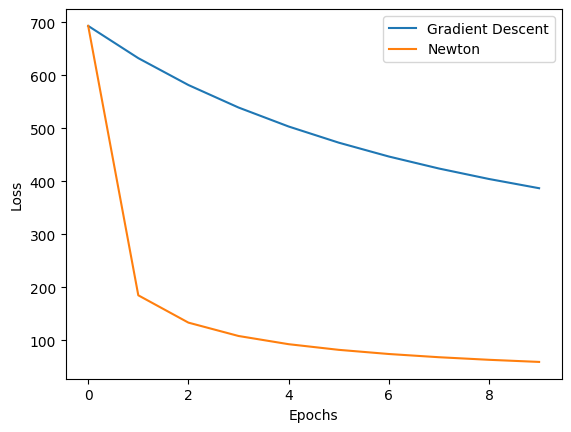

In [234]:
#plot loss history and loss history2
plt.plot(range(epochs),loss_history)
plt.plot(range(epochs),loss_history2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
#legend
plt.legend(['Gradient Descent','Newton'])

plt.show()


2

In [249]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state    

train_samples = 500
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])  
X = X[permutation]  
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [250]:
logistic = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('logistic', logistic)])
param_grid = {'logistic__C': np.logspace(-2, 2, 9)}

grid_search = GridSearchCV(pipeline, param_grid)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters:  {'logistic__C': 0.31622776601683794}
Best score:  0.8220000000000001


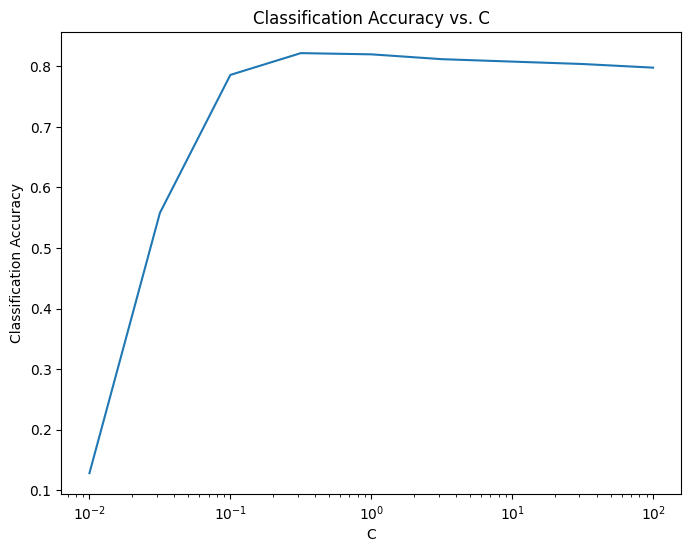

In [253]:
mean_test_scores = grid_search.cv_results_['mean_test_score']

C_values = np.logspace(-2, 2, 9)

plt.figure(figsize=(8, 6))
plt.plot(C_values, mean_test_scores)
plt.xscale('log')  # Since C values are in log scale
plt.title("Classification Accuracy vs. C")
plt.xlabel("C")
plt.ylabel("Classification Accuracy")
plt.show()

In [254]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict the test set results
y_pred = grid_search.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Confusion Matrix:")
print(cm)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Confusion Matrix:
[[ 3  0  0  0  0  0  1  0  0  0]
 [ 0 15  0  0  0  0  1  0  0  0]
 [ 0  0  9  0  0  0  2  0  2  0]
 [ 0  1  0 10  0  0  1  2  0  0]
 [ 0  0  0  0  8  0  0  1  0  1]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  1  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  1]
 [ 0  2  0  0  0  0  0  0  6  0]
 [ 1  0  0  0  1  0  0  2  0  6]]
Precision:  0.8326722108301056
Recall:  0.8
F1-Score:  0.802717019822283


3

In [235]:
W = [[-6,0.05,1]]
X = [[1,40,3.5]]
W=np.array(W)
X=np.array(X)
z=np.dot(W,X.T)
print(1/(1+np.exp(-z)))




[[0.37754067]]


In [233]:
W = [[-6,0.05,1]]
X = [[1,50,3.5]]
W=np.array(W)
X=np.array(X)
print(W.shape,X.shape)
z=np.dot(W,X.T)
print(1/(1+np.exp(-z)))

(1, 3) (1, 3)
[[0.5]]
